In [17]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import autokeras as ak
from sklearn import model_selection
from tensorflow import keras
import pydot
import lightgbm as lgb

In [2]:
# importing data
df = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


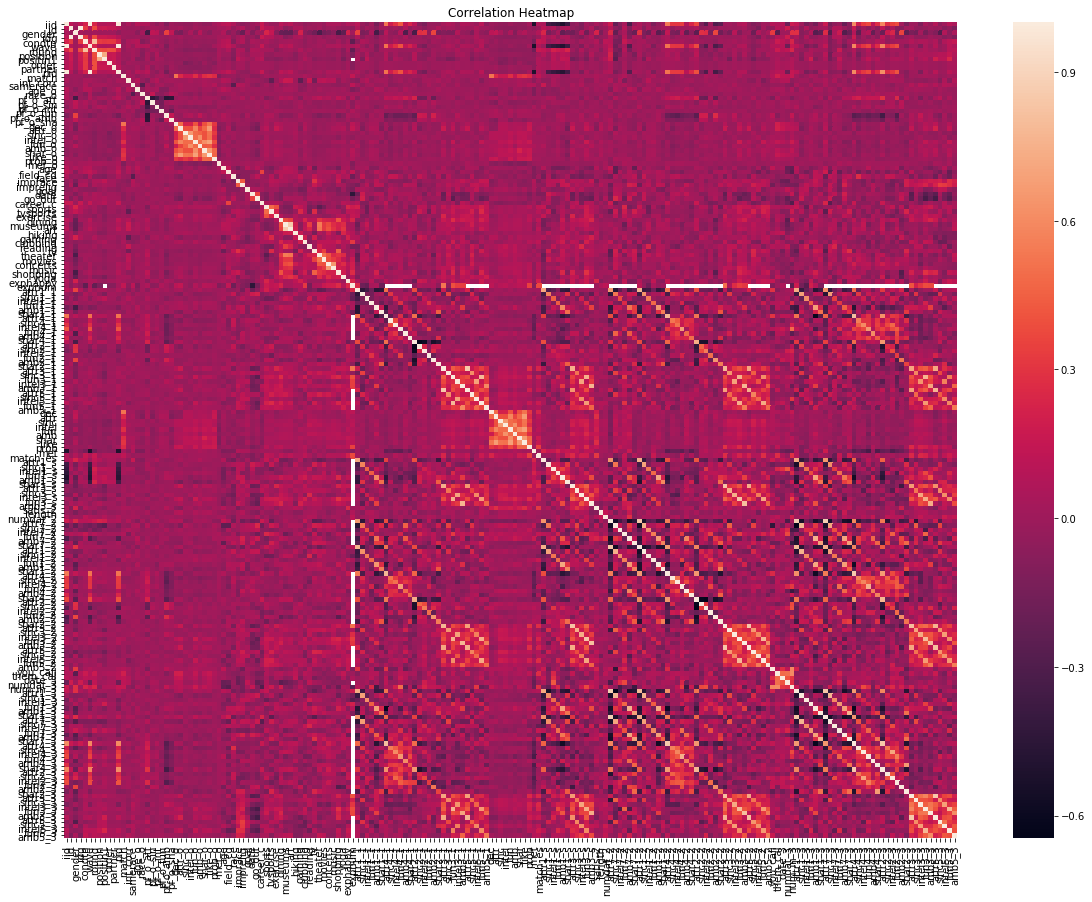

In [3]:
# correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [4]:
corr = df.corr()['match'].sort_values(ascending = False)[1:11]

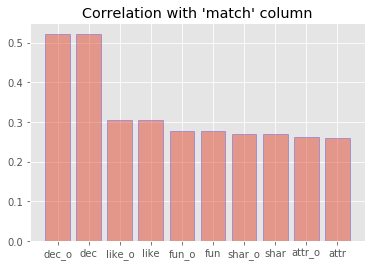

In [5]:
plt.style.use('ggplot')
plt.bar(corr.index, corr.values, align='center', alpha=0.5, edgecolor='blue')
plt.title('Correlation with \'match\' column')

plt.show()

In [6]:
import statsmodels.api as sm

reg= sm.OLS.from_formula("match ~ gender+ samerace+ age_o+ race_o+ attr_o+ imprace+ imprelig+ date+ go_out+ career_c", df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     63.06
Date:                Fri, 03 Jan 2020   Prob (F-statistic):          5.41e-124
Time:                        14:26:17   Log-Likelihood:                -3155.5
No. Observations:                7935   AIC:                             6333.
Df Residuals:                    7924   BIC:                             6410.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0838      0.041      2.042      0.041       0.003       0.164
gender         0.0190      0.008      2.249      0.025       0.002       0.036
samerace   -4.021e-05      0.009     -0.005      0.996      -0.017       0.017
age_o         -0.0048      0.001     -4.204      0.000      -0.007      -0.003
race_o        -0.0044      0.003     -1.295      0.195      -0.011       0.002
attr_o         0.0495      0.002     23.243      0.000       0.045       0.054
imprace       -0.0062      0.002     -3.934      0.000      -0.009      -0.003
imprelig       0.0007      0.002      0.430      0.667      -0.002       0.004
date          -0.0092      0.003     -3.056      0.002      -0.015      -0.003
go_out        -0.0033      0.004     -0.830      0.407      -0.011       0.005
career_c      -0.0034      0.001     -2.802      0.005      -0.006      -0.001
==============================================================================
Omnibus:                     1872.796   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3483.040
Skew:                           1.560   Prob(JB):                         0.00
Kurtosis:                       3.896   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
extract_column = ['match', 'age_o', 'attr_o', 'imprace', 'date', 'career_c',
                 'like', 'dec']
df1 = df[extract_column].copy()

In [8]:
df1.isnull().sum()

match         0
age_o       104
attr_o      212
imprace      79
date         97
career_c    138
like        240
dec           0
dtype: int64

In [9]:
df2 = df1.dropna()

In [10]:
df2.head()

,match,age_o,attr_o,imprace,date,career_c,like,dec
30,0,27.0,6.0,1.0,5.0,1.0,6.0,0
31,0,22.0,6.0,1.0,5.0,1.0,8.0,0
32,0,22.0,10.0,1.0,5.0,1.0,4.0,0
33,1,23.0,7.0,1.0,5.0,1.0,8.0,1
34,0,24.0,8.0,1.0,5.0,1.0,7.0,0


## Deep Learning model

In [14]:
target = df2['match'].copy()
data = df2.copy()
del data['match']

train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
train_label = train_label.values.reshape(len(train_label), 1)
test_label = test_label.values.reshape(len(test_label), 1)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(5483, 7)
(2351, 7)
(5483, 1)
(2351, 1)


In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(train_label)
train_label = enc.transform(train_label).toarray()

enc.fit(test_label)
test_label = enc.transform(test_label).toarray()

print(train_label.shape)
print(test_label.shape)

# from tensorflow.keras import utils
# train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
# test_label = utils.to_categorical(test_label) # 0 or 1 -> one-hot vector

(5483, 2)
(2351, 2)


In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [17]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=7, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [18]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [19]:
history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3) 

Train on 3838 samples, validate on 1645 samples
Epoch 1/20
3838/3838 [==============================] - ETA: 4s - loss: 0.8293 - categorical_accuracy: 0.56 - ETA: 0s - loss: 0.7119 - categorical_accuracy: 0.74 - ETA: 0s - loss: 0.5698 - categorical_accuracy: 0.79 - ETA: 0s - loss: 0.5151 - categorical_accuracy: 0.80 - 1s 141us/sample - loss: 0.4873 - categorical_accuracy: 0.8114 - val_loss: 0.4185 - val_categorical_accuracy: 0.8103
Epoch 2/20
3838/3838 [==============================] - ETA: 0s - loss: 0.2811 - categorical_accuracy: 0.88 - ETA: 0s - loss: 0.3161 - categorical_accuracy: 0.86 - ETA: 0s - loss: 0.3317 - categorical_accuracy: 0.85 - ETA: 0s - loss: 0.3195 - categorical_accuracy: 0.85 - ETA: 0s - loss: 0.3163 - categorical_accuracy: 0.85 - 0s 70us/sample - loss: 0.3163 - categorical_accuracy: 0.8593 - val_loss: 0.4940 - val_categorical_accuracy: 0.7714
Epoch 3/20
3838/3838 [==============================] - ETA: 0s - loss: 0.3236 - categorical_accuracy: 0.80 - ETA: 0s - los

In [20]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

2351/2351 [==============================] - ETA: 0s - loss: 0.1541 - categorical_accuracy: 0.92 - 0s 21us/sample - loss: 0.2381 - categorical_accuracy: 0.8822
loss (cross-entropy) : 0.23812479926697094
test accuracy : 0.88217777


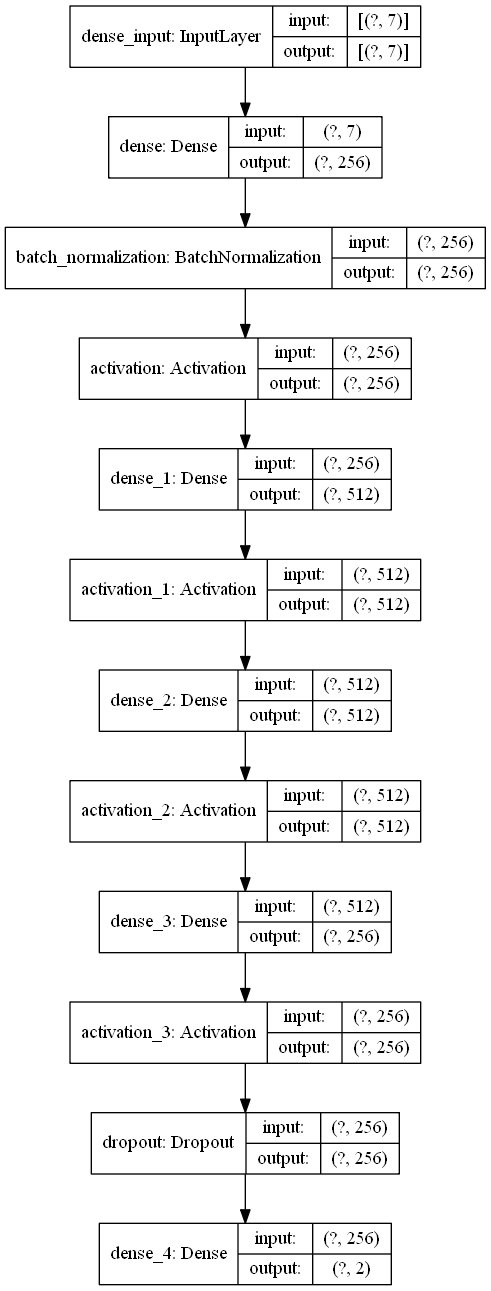

In [23]:
keras.utils.plot_model(model, 'deeplearning_model.png', show_shapes=True)

## Machine Learning model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# cross-validation by using K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring ='accuracy'

In [ ]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
train_label = train_label.values.reshape(len(train_label), 1)
test_label = test_label.values.reshape(len(test_label), 1)

### Randomforest

In [87]:
clf = RandomForestClassifier(n_estimators=200)

score = cross_val_score(clf, train_data, train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

[0.87431694 0.89071038 0.856102   0.87773723 0.86678832 0.8850365
 0.87591241 0.86861314 0.88686131 0.84854015]
87.31


## Autokeras

In [11]:
target = df2['match'].copy()
data = df2.copy()
del data['match']

train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
train_label = train_label.values.reshape(len(train_label), 1)
test_label = test_label.values.reshape(len(test_label), 1)

In [12]:
# It tries 10 different models.
clf = ak.StructuredDataClassifier(max_trials=10)
# Feed the structured data classifier with training data.
clf.fit(train_data, train_label)
# Predict with the best model.
predicted_y = clf.predict(test_data)
# Evaluate the best model with testing data.
print(clf.evaluate(test_data, test_label))

Epoch 1/1000
138/138 [==============================]1.4563 - accuracy: 0.218 - 0s 218ms/step - loss: 1.5414 - accuracy: 0.203 - 0s 149ms/step - loss: 1.5428 - accuracy: 0.187 - 0s 114ms/step - loss: 1.4228 - accuracy: 0.210 - 0s 93ms/step - loss: 1.3391 - accuracy: 0.243 - 0s 79ms/step - loss: 1.2478 - accuracy: 0.29 - 0s 69ms/step - loss: 1.1975 - accuracy: 0.31 - 0s 61ms/step - loss: 1.1383 - accuracy: 0.34 - 1s 56ms/step - loss: 1.0871 - accuracy: 0.37 - 1s 51ms/step - loss: 1.0568 - accuracy: 0.39 - 1s 47ms/step - loss: 1.0237 - accuracy: 0.41 - 1s 44ms/step - loss: 0.9875 - accuracy: 0.43 - 1s 41ms/step - loss: 0.9614 - accuracy: 0.45 - 1s 39ms/step - loss: 0.9379 - accuracy: 0.46 - 1s 37ms/step - loss: 0.9015 - accuracy: 0.49 - 1s 35ms/step - loss: 0.8836 - accuracy: 0.51 - 1s 34ms/step - loss: 0.8700 - accuracy: 0.52 - 1s 32ms/step - loss: 0.8459 - accuracy: 0.54 - 1s 31ms/step - loss: 0.8366 - accuracy: 0.56 - 1s 30ms/step - loss: 0.8143 - accuracy: 0.57 - 1s 29ms/step - loss:

138/138 [==============================] - ETA: 2s - loss: 0.2422 - accuracy: 0.87 - ETA: 1s - loss: 0.2671 - accuracy: 0.84 - ETA: 0s - loss: 0.2780 - accuracy: 0.83 - ETA: 0s - loss: 0.2789 - accuracy: 0.84 - ETA: 0s - loss: 0.2690 - accuracy: 0.84 - ETA: 0s - loss: 0.2705 - accuracy: 0.84 - ETA: 0s - loss: 0.2820 - accuracy: 0.84 - ETA: 0s - loss: 0.2788 - accuracy: 0.84 - ETA: 0s - loss: 0.2765 - accuracy: 0.84 - ETA: 0s - loss: 0.2782 - accuracy: 0.84 - ETA: 0s - loss: 0.2795 - accuracy: 0.84 - ETA: 0s - loss: 0.2800 - accuracy: 0.84 - ETA: 0s - loss: 0.2818 - accuracy: 0.84 - ETA: 0s - loss: 0.2811 - accuracy: 0.84 - ETA: 0s - loss: 0.2778 - accuracy: 0.84 - ETA: 0s - loss: 0.2776 - accuracy: 0.84 - ETA: 0s - loss: 0.2791 - accuracy: 0.84 - 1s 9ms/step - loss: 0.2774 - accuracy: 0.8466 - val_loss: 0.2858 - val_accuracy: 0.8303
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.2304 - accuracy: 0.93 - ETA: 1s - loss: 0.2728 - accuracy: 0.84 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1822 - accuracy: 0.96 - ETA: 1s - loss: 0.2344 - accuracy: 0.88 - ETA: 1s - loss: 0.2397 - accuracy: 0.87 - ETA: 1s - loss: 0.2503 - accuracy: 0.86 - ETA: 0s - loss: 0.2441 - accuracy: 0.87 - ETA: 0s - loss: 0.2409 - accuracy: 0.87 - ETA: 0s - loss: 0.2454 - accuracy: 0.87 - ETA: 0s - loss: 0.2540 - accuracy: 0.86 - ETA: 0s - loss: 0.2546 - accuracy: 0.86 - ETA: 0s - loss: 0.2540 - accuracy: 0.86 - ETA: 0s - loss: 0.2564 - accuracy: 0.86 - ETA: 0s - loss: 0.2601 - accuracy: 0.86 - ETA: 0s - loss: 0.2593 - accuracy: 0.86 - ETA: 0s - loss: 0.2559 - accuracy: 0.86 - ETA: 0s - loss: 0.2568 - accuracy: 0.86 - ETA: 0s - loss: 0.2558 - accuracy: 0.86 - ETA: 0s - loss: 0.2553 - accuracy: 0.86 - 1s 9ms/step - loss: 0.2553 - accuracy: 0.8655 - val_loss: 0.2767 - val_accuracy: 0.8495
Epoch 32/1000
138/138 [==============================] - ETA: 2s - loss: 0.1789 - accuracy: 0.96 - ETA: 1s - loss: 0.2456 - accuracy: 0.87 - ETA: 0s - loss

Epoch 1/1000
138/138 [==============================]0.5235 - accuracy: 0.843 - 0s 194ms/step - loss: 0.4109 - accuracy: 0.875 - 0s 132ms/step - loss: 0.3829 - accuracy: 0.885 - 0s 102ms/step - loss: 0.4047 - accuracy: 0.882 - 0s 83ms/step - loss: 0.4405 - accuracy: 0.862 - 0s 71ms/step - loss: 0.4981 - accuracy: 0.83 - 0s 62ms/step - loss: 0.4864 - accuracy: 0.84 - 0s 55ms/step - loss: 0.4772 - accuracy: 0.85 - 0s 50ms/step - loss: 0.4736 - accuracy: 0.85 - 0s 46ms/step - loss: 0.4904 - accuracy: 0.84 - 0s 42ms/step - loss: 0.4993 - accuracy: 0.83 - 0s 39ms/step - loss: 0.4874 - accuracy: 0.84 - 0s 37ms/step - loss: 0.4852 - accuracy: 0.84 - 0s 35ms/step - loss: 0.4848 - accuracy: 0.84 - 0s 33ms/step - loss: 0.4770 - accuracy: 0.84 - 1s 31ms/step - loss: 0.4804 - accuracy: 0.84 - 1s 30ms/step - loss: 0.4864 - accuracy: 0.83 - 1s 29ms/step - loss: 0.4815 - accuracy: 0.84 - 1s 28ms/step - loss: 0.4887 - accuracy: 0.83 - 1s 27ms/step - loss: 0.4849 - accuracy: 0.84 - 1s 26ms/step - loss:

138/138 [==============================] - ETA: 2s - loss: 0.2363 - accuracy: 0.90 - ETA: 1s - loss: 0.2626 - accuracy: 0.85 - ETA: 0s - loss: 0.2799 - accuracy: 0.84 - ETA: 0s - loss: 0.2838 - accuracy: 0.84 - ETA: 0s - loss: 0.2737 - accuracy: 0.85 - ETA: 0s - loss: 0.2739 - accuracy: 0.85 - ETA: 0s - loss: 0.2879 - accuracy: 0.84 - ETA: 0s - loss: 0.2829 - accuracy: 0.84 - ETA: 0s - loss: 0.2888 - accuracy: 0.83 - ETA: 0s - loss: 0.2896 - accuracy: 0.83 - ETA: 0s - loss: 0.2888 - accuracy: 0.83 - ETA: 0s - loss: 0.2904 - accuracy: 0.83 - ETA: 0s - loss: 0.2909 - accuracy: 0.83 - ETA: 0s - loss: 0.2891 - accuracy: 0.83 - ETA: 0s - loss: 0.2856 - accuracy: 0.83 - ETA: 0s - loss: 0.2859 - accuracy: 0.83 - ETA: 0s - loss: 0.2868 - accuracy: 0.83 - 1s 8ms/step - loss: 0.2854 - accuracy: 0.8413 - val_loss: 0.3023 - val_accuracy: 0.8212
Epoch 14/1000
138/138 [==============================] - ETA: 2s - loss: 0.2314 - accuracy: 0.90 - ETA: 0s - loss: 0.2737 - accuracy: 0.85 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1805 - accuracy: 0.96 - ETA: 1s - loss: 0.2453 - accuracy: 0.85 - ETA: 0s - loss: 0.2634 - accuracy: 0.85 - ETA: 0s - loss: 0.2680 - accuracy: 0.85 - ETA: 0s - loss: 0.2534 - accuracy: 0.86 - ETA: 0s - loss: 0.2550 - accuracy: 0.85 - ETA: 0s - loss: 0.2667 - accuracy: 0.85 - ETA: 0s - loss: 0.2659 - accuracy: 0.84 - ETA: 0s - loss: 0.2707 - accuracy: 0.84 - ETA: 0s - loss: 0.2716 - accuracy: 0.84 - ETA: 0s - loss: 0.2703 - accuracy: 0.84 - ETA: 0s - loss: 0.2707 - accuracy: 0.84 - ETA: 0s - loss: 0.2719 - accuracy: 0.84 - ETA: 0s - loss: 0.2715 - accuracy: 0.84 - ETA: 0s - loss: 0.2682 - accuracy: 0.84 - ETA: 0s - loss: 0.2673 - accuracy: 0.84 - ETA: 0s - loss: 0.2682 - accuracy: 0.84 - 1s 9ms/step - loss: 0.2664 - accuracy: 0.8514 - val_loss: 0.2893 - val_accuracy: 0.8303
Epoch 32/1000
138/138 [==============================] - ETA: 2s - loss: 0.1787 - accuracy: 0.96 - ETA: 1s - loss: 0.2447 - accuracy: 0.86 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1613 - accuracy: 0.96 - ETA: 1s - loss: 0.2472 - accuracy: 0.86 - ETA: 0s - loss: 0.2521 - accuracy: 0.86 - ETA: 0s - loss: 0.2563 - accuracy: 0.86 - ETA: 0s - loss: 0.2440 - accuracy: 0.87 - ETA: 0s - loss: 0.2434 - accuracy: 0.87 - ETA: 0s - loss: 0.2603 - accuracy: 0.85 - ETA: 0s - loss: 0.2566 - accuracy: 0.86 - ETA: 0s - loss: 0.2579 - accuracy: 0.85 - ETA: 0s - loss: 0.2598 - accuracy: 0.85 - ETA: 0s - loss: 0.2601 - accuracy: 0.85 - ETA: 0s - loss: 0.2612 - accuracy: 0.85 - ETA: 0s - loss: 0.2617 - accuracy: 0.85 - ETA: 0s - loss: 0.2626 - accuracy: 0.85 - ETA: 0s - loss: 0.2595 - accuracy: 0.85 - ETA: 0s - loss: 0.2582 - accuracy: 0.85 - ETA: 0s - loss: 0.2584 - accuracy: 0.85 - 1s 8ms/step - loss: 0.2573 - accuracy: 0.8582 - val_loss: 0.2858 - val_accuracy: 0.8394
Epoch 50/1000
138/138 [==============================] - ETA: 2s - loss: 0.1597 - accuracy: 0.96 - ETA: 1s - loss: 0.2360 - accuracy: 0.87 - ETA: 0s - loss

Epoch 1/1000
138/138 [==============================]0.7486 - accuracy: 0.500 - 0s 169ms/step - loss: 0.7388 - accuracy: 0.500 - 0s 115ms/step - loss: 0.7380 - accuracy: 0.489 - 0s 89ms/step - loss: 0.7533 - accuracy: 0.507 - 0s 72ms/step - loss: 0.7440 - accuracy: 0.53 - 0s 62ms/step - loss: 0.7428 - accuracy: 0.54 - 0s 54ms/step - loss: 0.7197 - accuracy: 0.56 - 0s 48ms/step - loss: 0.6925 - accuracy: 0.57 - 0s 44ms/step - loss: 0.6751 - accuracy: 0.60 - 0s 40ms/step - loss: 0.6636 - accuracy: 0.61 - 0s 37ms/step - loss: 0.6561 - accuracy: 0.62 - 0s 35ms/step - loss: 0.6284 - accuracy: 0.64 - 0s 33ms/step - loss: 0.6113 - accuracy: 0.65 - 0s 31ms/step - loss: 0.6061 - accuracy: 0.66 - 0s 30ms/step - loss: 0.5934 - accuracy: 0.68 - 0s 28ms/step - loss: 0.5934 - accuracy: 0.69 - 0s 27ms/step - loss: 0.5999 - accuracy: 0.69 - 0s 26ms/step - loss: 0.5850 - accuracy: 0.70 - 0s 25ms/step - loss: 0.5883 - accuracy: 0.71 - 0s 24ms/step - loss: 0.5795 - accuracy: 0.72 - 0s 23ms/step - loss: 0

138/138 [==============================] - ETA: 2s - loss: 0.2083 - accuracy: 0.90 - ETA: 0s - loss: 0.2662 - accuracy: 0.86 - ETA: 0s - loss: 0.2706 - accuracy: 0.84 - ETA: 0s - loss: 0.2754 - accuracy: 0.84 - ETA: 0s - loss: 0.2630 - accuracy: 0.86 - ETA: 0s - loss: 0.2658 - accuracy: 0.85 - ETA: 0s - loss: 0.2795 - accuracy: 0.84 - ETA: 0s - loss: 0.2767 - accuracy: 0.84 - ETA: 0s - loss: 0.2756 - accuracy: 0.84 - ETA: 0s - loss: 0.2788 - accuracy: 0.84 - ETA: 0s - loss: 0.2803 - accuracy: 0.84 - ETA: 0s - loss: 0.2828 - accuracy: 0.84 - ETA: 0s - loss: 0.2804 - accuracy: 0.84 - ETA: 0s - loss: 0.2766 - accuracy: 0.84 - ETA: 0s - loss: 0.2788 - accuracy: 0.84 - ETA: 0s - loss: 0.2764 - accuracy: 0.84 - ETA: 0s - loss: 0.2785 - accuracy: 0.84 - 1s 9ms/step - loss: 0.2769 - accuracy: 0.8448 - val_loss: 0.2933 - val_accuracy: 0.8239
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.2049 - accuracy: 0.93 - ETA: 1s - loss: 0.2566 - accuracy: 0.87 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1660 - accuracy: 0.96 - ETA: 0s - loss: 0.2510 - accuracy: 0.87 - ETA: 0s - loss: 0.2444 - accuracy: 0.86 - ETA: 0s - loss: 0.2486 - accuracy: 0.86 - ETA: 0s - loss: 0.2429 - accuracy: 0.86 - ETA: 0s - loss: 0.2507 - accuracy: 0.86 - ETA: 0s - loss: 0.2558 - accuracy: 0.85 - ETA: 0s - loss: 0.2578 - accuracy: 0.85 - ETA: 0s - loss: 0.2573 - accuracy: 0.85 - ETA: 0s - loss: 0.2577 - accuracy: 0.86 - ETA: 0s - loss: 0.2581 - accuracy: 0.86 - ETA: 0s - loss: 0.2611 - accuracy: 0.86 - ETA: 0s - loss: 0.2614 - accuracy: 0.85 - ETA: 0s - loss: 0.2585 - accuracy: 0.86 - ETA: 0s - loss: 0.2574 - accuracy: 0.86 - ETA: 0s - loss: 0.2578 - accuracy: 0.86 - ETA: 0s - loss: 0.2573 - accuracy: 0.86 - 1s 9ms/step - loss: 0.2573 - accuracy: 0.8619 - val_loss: 0.2873 - val_accuracy: 0.8403
Epoch 31/1000
138/138 [==============================] - ETA: 2s - loss: 0.1643 - accuracy: 0.96 - ETA: 1s - loss: 0.2478 - accuracy: 0.88 - ETA: 0s - loss

Epoch 1/1000
138/138 [==============================]1.5765 - accuracy: 0.468 - 0s 222ms/step - loss: 1.5249 - accuracy: 0.437 - 0s 151ms/step - loss: 1.4304 - accuracy: 0.468 - 0s 116ms/step - loss: 1.3860 - accuracy: 0.476 - 0s 94ms/step - loss: 1.2607 - accuracy: 0.518 - 0s 80ms/step - loss: 1.1928 - accuracy: 0.53 - 0s 70ms/step - loss: 1.1057 - accuracy: 0.54 - 0s 62ms/step - loss: 1.0661 - accuracy: 0.57 - 1s 56ms/step - loss: 1.0460 - accuracy: 0.57 - 1s 51ms/step - loss: 1.0293 - accuracy: 0.59 - 1s 47ms/step - loss: 1.0269 - accuracy: 0.59 - 1s 44ms/step - loss: 0.9838 - accuracy: 0.61 - 1s 41ms/step - loss: 0.9539 - accuracy: 0.62 - 1s 39ms/step - loss: 0.9172 - accuracy: 0.62 - 1s 37ms/step - loss: 0.8940 - accuracy: 0.64 - 1s 35ms/step - loss: 0.8869 - accuracy: 0.64 - 1s 33ms/step - loss: 0.8857 - accuracy: 0.64 - 1s 32ms/step - loss: 0.9029 - accuracy: 0.65 - 1s 31ms/step - loss: 0.9272 - accuracy: 0.65 - 1s 30ms/step - loss: 0.9066 - accuracy: 0.65 - 1s 29ms/step - loss:

138/138 [==============================] - ETA: 2s - loss: 0.3568 - accuracy: 0.87 - ETA: 1s - loss: 0.3692 - accuracy: 0.85 - ETA: 0s - loss: 0.3550 - accuracy: 0.84 - ETA: 0s - loss: 0.3643 - accuracy: 0.83 - ETA: 0s - loss: 0.3629 - accuracy: 0.83 - ETA: 0s - loss: 0.3676 - accuracy: 0.83 - ETA: 0s - loss: 0.3771 - accuracy: 0.82 - ETA: 0s - loss: 0.3702 - accuracy: 0.82 - ETA: 0s - loss: 0.3784 - accuracy: 0.82 - ETA: 0s - loss: 0.3800 - accuracy: 0.82 - ETA: 0s - loss: 0.3785 - accuracy: 0.82 - ETA: 0s - loss: 0.3766 - accuracy: 0.82 - ETA: 0s - loss: 0.3766 - accuracy: 0.82 - ETA: 0s - loss: 0.3736 - accuracy: 0.82 - ETA: 0s - loss: 0.3713 - accuracy: 0.82 - ETA: 0s - loss: 0.3683 - accuracy: 0.82 - ETA: 0s - loss: 0.3714 - accuracy: 0.82 - 1s 9ms/step - loss: 0.3714 - accuracy: 0.8224 - val_loss: 0.3072 - val_accuracy: 0.8358
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.3233 - accuracy: 0.84 - ETA: 0s - loss: 0.3263 - accuracy: 0.84 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2446 - accuracy: 0.84 - ETA: 0s - loss: 0.2706 - accuracy: 0.85 - ETA: 0s - loss: 0.2783 - accuracy: 0.83 - ETA: 0s - loss: 0.2909 - accuracy: 0.83 - ETA: 0s - loss: 0.2886 - accuracy: 0.83 - ETA: 0s - loss: 0.2975 - accuracy: 0.82 - ETA: 0s - loss: 0.2975 - accuracy: 0.82 - ETA: 0s - loss: 0.3008 - accuracy: 0.82 - ETA: 0s - loss: 0.3025 - accuracy: 0.81 - ETA: 0s - loss: 0.3020 - accuracy: 0.82 - ETA: 0s - loss: 0.3003 - accuracy: 0.82 - ETA: 0s - loss: 0.3001 - accuracy: 0.82 - ETA: 0s - loss: 0.2979 - accuracy: 0.82 - ETA: 0s - loss: 0.2949 - accuracy: 0.82 - ETA: 0s - loss: 0.2950 - accuracy: 0.82 - ETA: 0s - loss: 0.2973 - accuracy: 0.82 - 1s 8ms/step - loss: 0.2978 - accuracy: 0.8227 - val_loss: 0.2847 - val_accuracy: 0.8358
Epoch 31/1000
138/138 [==============================] - ETA: 2s - loss: 0.2329 - accuracy: 0.87 - ETA: 1s - loss: 0.2666 - accuracy: 0.85 - ETA: 0s - loss: 0.2716 - accuracy: 0.84 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2030 - accuracy: 0.90 - ETA: 1s - loss: 0.2467 - accuracy: 0.85 - ETA: 0s - loss: 0.2644 - accuracy: 0.83 - ETA: 0s - loss: 0.2739 - accuracy: 0.83 - ETA: 0s - loss: 0.2646 - accuracy: 0.84 - ETA: 0s - loss: 0.2707 - accuracy: 0.83 - ETA: 0s - loss: 0.2793 - accuracy: 0.82 - ETA: 0s - loss: 0.2787 - accuracy: 0.83 - ETA: 0s - loss: 0.2819 - accuracy: 0.82 - ETA: 0s - loss: 0.2833 - accuracy: 0.83 - ETA: 0s - loss: 0.2838 - accuracy: 0.83 - ETA: 0s - loss: 0.2817 - accuracy: 0.83 - ETA: 0s - loss: 0.2833 - accuracy: 0.83 - ETA: 0s - loss: 0.2817 - accuracy: 0.83 - ETA: 0s - loss: 0.2791 - accuracy: 0.83 - ETA: 0s - loss: 0.2790 - accuracy: 0.83 - ETA: 0s - loss: 0.2796 - accuracy: 0.83 - 1s 9ms/step - loss: 0.2791 - accuracy: 0.8372 - val_loss: 0.2759 - val_accuracy: 0.8495
Epoch 49/1000
138/138 [==============================] - ETA: 2s - loss: 0.2219 - accuracy: 0.81 - ETA: 1s - loss: 0.2683 - accuracy: 0.83 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1936 - accuracy: 0.87 - ETA: 0s - loss: 0.2505 - accuracy: 0.85 - ETA: 0s - loss: 0.2566 - accuracy: 0.84 - ETA: 0s - loss: 0.2725 - accuracy: 0.83 - ETA: 0s - loss: 0.2665 - accuracy: 0.83 - ETA: 0s - loss: 0.2678 - accuracy: 0.83 - ETA: 0s - loss: 0.2809 - accuracy: 0.82 - ETA: 0s - loss: 0.2761 - accuracy: 0.82 - ETA: 0s - loss: 0.2757 - accuracy: 0.82 - ETA: 0s - loss: 0.2799 - accuracy: 0.82 - ETA: 0s - loss: 0.2807 - accuracy: 0.82 - ETA: 0s - loss: 0.2820 - accuracy: 0.82 - ETA: 0s - loss: 0.2801 - accuracy: 0.82 - ETA: 0s - loss: 0.2791 - accuracy: 0.82 - ETA: 0s - loss: 0.2784 - accuracy: 0.82 - ETA: 0s - loss: 0.2769 - accuracy: 0.82 - ETA: 0s - loss: 0.2788 - accuracy: 0.82 - 1s 9ms/step - loss: 0.2788 - accuracy: 0.8252 - val_loss: 0.2732 - val_accuracy: 0.8677
Epoch 67/1000
138/138 [==============================] - ETA: 2s - loss: 0.1694 - accuracy: 0.96 - ETA: 0s - loss: 0.2546 - accuracy: 0.86 - ETA: 0s - loss

Epoch 1/1000
138/138 [==============================]0.7266 - accuracy: 0.562 - 1s 404ms/step - loss: 0.6517 - accuracy: 0.609 - 1s 273ms/step - loss: 0.6270 - accuracy: 0.635 - 1s 207ms/step - loss: 0.6225 - accuracy: 0.632 - 1s 167ms/step - loss: 0.6148 - accuracy: 0.631 - 1s 141ms/step - loss: 0.6472 - accuracy: 0.593 - 1s 122ms/step - loss: 0.6472 - accuracy: 0.589 - 1s 108ms/step - loss: 0.6474 - accuracy: 0.593 - 1s 97ms/step - loss: 0.6765 - accuracy: 0.586 - 1s 88ms/step - loss: 0.6766 - accuracy: 0.58 - 1s 80ms/step - loss: 0.6843 - accuracy: 0.59 - 1s 74ms/step - loss: 0.6835 - accuracy: 0.59 - 1s 69ms/step - loss: 0.6734 - accuracy: 0.60 - 1s 65ms/step - loss: 0.6727 - accuracy: 0.60 - 1s 61ms/step - loss: 0.6773 - accuracy: 0.61 - 1s 58ms/step - loss: 0.6882 - accuracy: 0.60 - 1s 55ms/step - loss: 0.6872 - accuracy: 0.60 - 1s 52ms/step - loss: 0.6868 - accuracy: 0.60 - 1s 50ms/step - loss: 0.6829 - accuracy: 0.60 - 1s 48ms/step - loss: 0.6834 - accuracy: 0.60 - 1s 46ms/step

138/138 [==============================] - ETA: 2s - loss: 0.3266 - accuracy: 0.84 - ETA: 0s - loss: 0.3949 - accuracy: 0.84 - ETA: 0s - loss: 0.4013 - accuracy: 0.84 - ETA: 0s - loss: 0.4075 - accuracy: 0.83 - ETA: 0s - loss: 0.4047 - accuracy: 0.83 - ETA: 0s - loss: 0.4002 - accuracy: 0.82 - ETA: 0s - loss: 0.4035 - accuracy: 0.82 - ETA: 0s - loss: 0.4091 - accuracy: 0.81 - ETA: 0s - loss: 0.4068 - accuracy: 0.82 - ETA: 0s - loss: 0.4092 - accuracy: 0.82 - ETA: 0s - loss: 0.4076 - accuracy: 0.82 - ETA: 0s - loss: 0.4091 - accuracy: 0.81 - ETA: 0s - loss: 0.4033 - accuracy: 0.82 - ETA: 0s - loss: 0.4008 - accuracy: 0.82 - ETA: 0s - loss: 0.4002 - accuracy: 0.82 - ETA: 0s - loss: 0.4029 - accuracy: 0.82 - 1s 8ms/step - loss: 0.4057 - accuracy: 0.8213 - val_loss: 0.3495 - val_accuracy: 0.8358
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.3651 - accuracy: 0.87 - ETA: 1s - loss: 0.3943 - accuracy: 0.84 - ETA: 0s - loss: 0.3832 - accuracy: 0.83 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2779 - accuracy: 0.81 - ETA: 0s - loss: 0.2946 - accuracy: 0.83 - ETA: 0s - loss: 0.2960 - accuracy: 0.82 - ETA: 0s - loss: 0.3096 - accuracy: 0.82 - ETA: 0s - loss: 0.3027 - accuracy: 0.82 - ETA: 0s - loss: 0.3110 - accuracy: 0.81 - ETA: 0s - loss: 0.3247 - accuracy: 0.81 - ETA: 0s - loss: 0.3240 - accuracy: 0.81 - ETA: 0s - loss: 0.3191 - accuracy: 0.81 - ETA: 0s - loss: 0.3184 - accuracy: 0.81 - ETA: 0s - loss: 0.3192 - accuracy: 0.81 - ETA: 0s - loss: 0.3229 - accuracy: 0.81 - ETA: 0s - loss: 0.3202 - accuracy: 0.81 - ETA: 0s - loss: 0.3165 - accuracy: 0.81 - ETA: 0s - loss: 0.3172 - accuracy: 0.81 - ETA: 0s - loss: 0.3170 - accuracy: 0.81 - ETA: 0s - loss: 0.3196 - accuracy: 0.81 - 1s 8ms/step - loss: 0.3189 - accuracy: 0.8165 - val_loss: 0.2837 - val_accuracy: 0.8358
Epoch 31/1000
138/138 [==============================] - ETA: 2s - loss: 0.2618 - accuracy: 0.87 - ETA: 1s - loss: 0.2807 - accuracy: 0.85 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2537 - accuracy: 0.84 - ETA: 1s - loss: 0.2828 - accuracy: 0.84 - ETA: 0s - loss: 0.2823 - accuracy: 0.83 - ETA: 0s - loss: 0.2927 - accuracy: 0.83 - ETA: 0s - loss: 0.2876 - accuracy: 0.83 - ETA: 0s - loss: 0.2917 - accuracy: 0.82 - ETA: 0s - loss: 0.3013 - accuracy: 0.82 - ETA: 0s - loss: 0.2959 - accuracy: 0.82 - ETA: 0s - loss: 0.2962 - accuracy: 0.82 - ETA: 0s - loss: 0.3008 - accuracy: 0.82 - ETA: 0s - loss: 0.3005 - accuracy: 0.82 - ETA: 0s - loss: 0.3011 - accuracy: 0.82 - ETA: 0s - loss: 0.3014 - accuracy: 0.82 - ETA: 0s - loss: 0.2986 - accuracy: 0.82 - ETA: 0s - loss: 0.2981 - accuracy: 0.82 - ETA: 0s - loss: 0.2970 - accuracy: 0.82 - ETA: 0s - loss: 0.2986 - accuracy: 0.82 - 1s 8ms/step - loss: 0.2986 - accuracy: 0.8220 - val_loss: 0.2813 - val_accuracy: 0.8358
Epoch 49/1000
138/138 [==============================] - ETA: 2s - loss: 0.2505 - accuracy: 0.84 - ETA: 1s - loss: 0.2696 - accuracy: 0.84 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2100 - accuracy: 0.87 - ETA: 1s - loss: 0.2796 - accuracy: 0.83 - ETA: 0s - loss: 0.2729 - accuracy: 0.84 - ETA: 0s - loss: 0.2853 - accuracy: 0.83 - ETA: 0s - loss: 0.2785 - accuracy: 0.84 - ETA: 0s - loss: 0.2822 - accuracy: 0.83 - ETA: 0s - loss: 0.2958 - accuracy: 0.82 - ETA: 0s - loss: 0.2911 - accuracy: 0.83 - ETA: 0s - loss: 0.2913 - accuracy: 0.83 - ETA: 0s - loss: 0.2917 - accuracy: 0.83 - ETA: 0s - loss: 0.2939 - accuracy: 0.83 - ETA: 0s - loss: 0.2941 - accuracy: 0.82 - ETA: 0s - loss: 0.2951 - accuracy: 0.82 - ETA: 0s - loss: 0.2947 - accuracy: 0.82 - ETA: 0s - loss: 0.2921 - accuracy: 0.83 - ETA: 0s - loss: 0.2915 - accuracy: 0.83 - ETA: 0s - loss: 0.2932 - accuracy: 0.82 - 1s 9ms/step - loss: 0.2932 - accuracy: 0.8281 - val_loss: 0.2782 - val_accuracy: 0.8349
Epoch 67/1000
138/138 [==============================] - ETA: 2s - loss: 0.2341 - accuracy: 0.84 - ETA: 1s - loss: 0.2741 - accuracy: 0.81 - ETA: 1s - loss

138/138 [==============================] - ETA: 2s - loss: 0.2081 - accuracy: 0.93 - ETA: 1s - loss: 0.2703 - accuracy: 0.81 - ETA: 0s - loss: 0.2812 - accuracy: 0.81 - ETA: 0s - loss: 0.2859 - accuracy: 0.82 - ETA: 0s - loss: 0.2787 - accuracy: 0.82 - ETA: 0s - loss: 0.2888 - accuracy: 0.82 - ETA: 0s - loss: 0.2865 - accuracy: 0.82 - ETA: 0s - loss: 0.2857 - accuracy: 0.82 - ETA: 0s - loss: 0.2898 - accuracy: 0.82 - ETA: 0s - loss: 0.2900 - accuracy: 0.82 - ETA: 0s - loss: 0.2912 - accuracy: 0.82 - ETA: 0s - loss: 0.2911 - accuracy: 0.82 - ETA: 0s - loss: 0.2891 - accuracy: 0.82 - ETA: 0s - loss: 0.2888 - accuracy: 0.82 - ETA: 0s - loss: 0.2888 - accuracy: 0.82 - ETA: 0s - loss: 0.2891 - accuracy: 0.81 - 1s 8ms/step - loss: 0.2891 - accuracy: 0.8195 - val_loss: 0.2758 - val_accuracy: 0.8358
Epoch 85/1000
138/138 [==============================] - ETA: 2s - loss: 0.2343 - accuracy: 0.87 - ETA: 1s - loss: 0.2619 - accuracy: 0.85 - ETA: 0s - loss: 0.2633 - accuracy: 0.84 - ETA: 0s - loss

Epoch 1/1000
138/138 [==============================]0.6408 - accuracy: 0.718 - 0s 192ms/step - loss: 0.4717 - accuracy: 0.812 - 0s 131ms/step - loss: 0.4279 - accuracy: 0.843 - 0s 100ms/step - loss: 0.4651 - accuracy: 0.851 - 0s 82ms/step - loss: 0.5538 - accuracy: 0.837 - 0s 70ms/step - loss: 0.6389 - accuracy: 0.81 - 0s 61ms/step - loss: 0.6119 - accuracy: 0.82 - 0s 54ms/step - loss: 0.5830 - accuracy: 0.83 - 0s 49ms/step - loss: 0.5705 - accuracy: 0.83 - 0s 45ms/step - loss: 0.5773 - accuracy: 0.82 - 0s 42ms/step - loss: 0.5710 - accuracy: 0.82 - 0s 39ms/step - loss: 0.5693 - accuracy: 0.82 - 0s 37ms/step - loss: 0.5646 - accuracy: 0.81 - 0s 35ms/step - loss: 0.5611 - accuracy: 0.82 - 0s 33ms/step - loss: 0.5508 - accuracy: 0.82 - 0s 31ms/step - loss: 0.5467 - accuracy: 0.82 - 1s 30ms/step - loss: 0.5529 - accuracy: 0.82 - 1s 29ms/step - loss: 0.5417 - accuracy: 0.82 - 1s 28ms/step - loss: 0.5439 - accuracy: 0.82 - 1s 27ms/step - loss: 0.5336 - accuracy: 0.82 - 1s 26ms/step - loss:

138/138 [==============================] - ETA: 2s - loss: 0.1847 - accuracy: 0.90 - ETA: 1s - loss: 0.2391 - accuracy: 0.85 - ETA: 0s - loss: 0.2599 - accuracy: 0.84 - ETA: 0s - loss: 0.2705 - accuracy: 0.83 - ETA: 0s - loss: 0.2659 - accuracy: 0.84 - ETA: 0s - loss: 0.2618 - accuracy: 0.84 - ETA: 0s - loss: 0.2713 - accuracy: 0.84 - ETA: 0s - loss: 0.2720 - accuracy: 0.84 - ETA: 0s - loss: 0.2729 - accuracy: 0.84 - ETA: 0s - loss: 0.2745 - accuracy: 0.84 - ETA: 0s - loss: 0.2739 - accuracy: 0.84 - ETA: 0s - loss: 0.2771 - accuracy: 0.84 - ETA: 0s - loss: 0.2790 - accuracy: 0.84 - ETA: 0s - loss: 0.2787 - accuracy: 0.84 - ETA: 0s - loss: 0.2768 - accuracy: 0.84 - ETA: 0s - loss: 0.2746 - accuracy: 0.84 - ETA: 0s - loss: 0.2730 - accuracy: 0.84 - ETA: 0s - loss: 0.2750 - accuracy: 0.84 - 1s 9ms/step - loss: 0.2735 - accuracy: 0.8457 - val_loss: 0.2717 - val_accuracy: 0.8568
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.1855 - accuracy: 0.90 - ETA: 1s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1563 - accuracy: 0.93 - ETA: 1s - loss: 0.2203 - accuracy: 0.84 - ETA: 1s - loss: 0.2233 - accuracy: 0.85 - ETA: 1s - loss: 0.2209 - accuracy: 0.86 - ETA: 0s - loss: 0.2306 - accuracy: 0.86 - ETA: 0s - loss: 0.2286 - accuracy: 0.87 - ETA: 0s - loss: 0.2401 - accuracy: 0.87 - ETA: 0s - loss: 0.2440 - accuracy: 0.86 - ETA: 0s - loss: 0.2473 - accuracy: 0.86 - ETA: 0s - loss: 0.2465 - accuracy: 0.86 - ETA: 0s - loss: 0.2458 - accuracy: 0.86 - ETA: 0s - loss: 0.2490 - accuracy: 0.86 - ETA: 0s - loss: 0.2497 - accuracy: 0.86 - ETA: 0s - loss: 0.2491 - accuracy: 0.86 - ETA: 0s - loss: 0.2500 - accuracy: 0.86 - ETA: 0s - loss: 0.2477 - accuracy: 0.86 - ETA: 0s - loss: 0.2457 - accuracy: 0.86 - ETA: 0s - loss: 0.2472 - accuracy: 0.86 - 1s 9ms/step - loss: 0.2471 - accuracy: 0.8687 - val_loss: 0.2771 - val_accuracy: 0.8695


Epoch 1/1000
138/138 [==============================]0.8546 - accuracy: 0.187 - 0s 171ms/step - loss: 0.7109 - accuracy: 0.515 - 0s 117ms/step - loss: 0.6025 - accuracy: 0.645 - 0s 90ms/step - loss: 0.5540 - accuracy: 0.703 - 0s 74ms/step - loss: 0.5771 - accuracy: 0.71 - 0s 63ms/step - loss: 0.6233 - accuracy: 0.71 - 0s 55ms/step - loss: 0.5879 - accuracy: 0.74 - 0s 49ms/step - loss: 0.5641 - accuracy: 0.76 - 0s 45ms/step - loss: 0.5500 - accuracy: 0.77 - 0s 41ms/step - loss: 0.5752 - accuracy: 0.76 - 0s 38ms/step - loss: 0.5855 - accuracy: 0.76 - 0s 36ms/step - loss: 0.5608 - accuracy: 0.78 - 0s 34ms/step - loss: 0.5578 - accuracy: 0.78 - 0s 32ms/step - loss: 0.5572 - accuracy: 0.79 - 0s 30ms/step - loss: 0.5421 - accuracy: 0.79 - 0s 29ms/step - loss: 0.5425 - accuracy: 0.79 - 0s 28ms/step - loss: 0.5449 - accuracy: 0.79 - 0s 27ms/step - loss: 0.5347 - accuracy: 0.80 - 0s 26ms/step - loss: 0.5370 - accuracy: 0.79 - 0s 25ms/step - loss: 0.5309 - accuracy: 0.80 - 1s 24ms/step - loss: 0

138/138 [==============================] - ETA: 2s - loss: 0.1979 - accuracy: 0.93 - ETA: 0s - loss: 0.2561 - accuracy: 0.85 - ETA: 0s - loss: 0.2639 - accuracy: 0.86 - ETA: 0s - loss: 0.2672 - accuracy: 0.86 - ETA: 0s - loss: 0.2595 - accuracy: 0.86 - ETA: 0s - loss: 0.2620 - accuracy: 0.86 - ETA: 0s - loss: 0.2763 - accuracy: 0.85 - ETA: 0s - loss: 0.2720 - accuracy: 0.85 - ETA: 0s - loss: 0.2780 - accuracy: 0.84 - ETA: 0s - loss: 0.2777 - accuracy: 0.84 - ETA: 0s - loss: 0.2754 - accuracy: 0.85 - ETA: 0s - loss: 0.2762 - accuracy: 0.84 - ETA: 0s - loss: 0.2774 - accuracy: 0.84 - ETA: 0s - loss: 0.2771 - accuracy: 0.84 - ETA: 0s - loss: 0.2744 - accuracy: 0.84 - ETA: 0s - loss: 0.2739 - accuracy: 0.84 - ETA: 0s - loss: 0.2754 - accuracy: 0.84 - 1s 9ms/step - loss: 0.2744 - accuracy: 0.8450 - val_loss: 0.2901 - val_accuracy: 0.8403
Epoch 13/1000
138/138 [==============================] - ETA: 2s - loss: 0.1944 - accuracy: 0.93 - ETA: 1s - loss: 0.2539 - accuracy: 0.86 - ETA: 0s - loss

138/138 [==============================] - ETA: 2s - loss: 0.1602 - accuracy: 0.90 - ETA: 0s - loss: 0.2325 - accuracy: 0.85 - ETA: 0s - loss: 0.2248 - accuracy: 0.87 - ETA: 0s - loss: 0.2298 - accuracy: 0.87 - ETA: 0s - loss: 0.2315 - accuracy: 0.87 - ETA: 0s - loss: 0.2299 - accuracy: 0.87 - ETA: 0s - loss: 0.2459 - accuracy: 0.86 - ETA: 0s - loss: 0.2439 - accuracy: 0.86 - ETA: 0s - loss: 0.2420 - accuracy: 0.86 - ETA: 0s - loss: 0.2433 - accuracy: 0.87 - ETA: 0s - loss: 0.2444 - accuracy: 0.87 - ETA: 0s - loss: 0.2489 - accuracy: 0.87 - ETA: 0s - loss: 0.2478 - accuracy: 0.87 - ETA: 0s - loss: 0.2461 - accuracy: 0.87 - ETA: 0s - loss: 0.2476 - accuracy: 0.86 - ETA: 0s - loss: 0.2449 - accuracy: 0.87 - ETA: 0s - loss: 0.2463 - accuracy: 0.87 - 1s 8ms/step - loss: 0.2464 - accuracy: 0.8712 - val_loss: 0.2797 - val_accuracy: 0.8531


Epoch 1/1000
138/138 [==============================].9641 - accuracy: 0.93 - 0s 59ms/step - loss: 0.7230 - accuracy: 0.95 - 0s 48ms/step - loss: 1.2825 - accuracy: 0.91 - 0s 44ms/step - loss: 1.6821 - accuracy: 0.89 - 0s 41ms/step - loss: 1.7301 - accuracy: 0.88 - 0s 38ms/step - loss: 1.6828 - accuracy: 0.89 - 0s 37ms/step - loss: 1.5797 - accuracy: 0.89 - 0s 36ms/step - loss: 1.5024 - accuracy: 0.90 - 0s 35ms/step - loss: 1.6559 - accuracy: 0.89 - 0s 34ms/step - loss: 1.6346 - accuracy: 0.89 - 0s 34ms/step - loss: 1.5298 - accuracy: 0.90 - 0s 34ms/step - loss: 1.4824 - accuracy: 0.90 - 0s 33ms/step - loss: 1.3684 - accuracy: 0.91 - 0s 33ms/step - loss: 1.3737 - accuracy: 0.91 - 0s 33ms/step - loss: 1.4101 - accuracy: 0.90 - 1s 32ms/step - loss: 1.3823 - accuracy: 0.91 - 1s 32ms/step - loss: 1.3293 - accuracy: 0.91 - 1s 32ms/step - loss: 1.3356 - accuracy: 0.91 - 1s 32ms/step - loss: 1.3159 - accuracy: 0.91 - 1s 32ms/step - loss: 1.3221 - accuracy: 0.91 - 1s 31ms/step - loss: 1.4196 -

138/138 [==============================] - ETA: 3s - loss: 0.9641 - accuracy: 0.93 - ETA: 4s - loss: 1.2825 - accuracy: 0.91 - ETA: 3s - loss: 1.7301 - accuracy: 0.88 - ETA: 3s - loss: 1.5024 - accuracy: 0.90 - ETA: 3s - loss: 1.6346 - accuracy: 0.89 - ETA: 3s - loss: 1.4824 - accuracy: 0.90 - ETA: 3s - loss: 1.4101 - accuracy: 0.90 - ETA: 3s - loss: 1.3293 - accuracy: 0.91 - ETA: 3s - loss: 1.3221 - accuracy: 0.91 - ETA: 3s - loss: 1.4863 - accuracy: 0.90 - ETA: 3s - loss: 1.4627 - accuracy: 0.90 - ETA: 3s - loss: 1.4057 - accuracy: 0.90 - ETA: 2s - loss: 1.4254 - accuracy: 0.90 - ETA: 2s - loss: 1.4426 - accuracy: 0.90 - ETA: 2s - loss: 1.4727 - accuracy: 0.90 - ETA: 2s - loss: 1.5274 - accuracy: 0.90 - ETA: 2s - loss: 1.4960 - accuracy: 0.90 - ETA: 2s - loss: 1.4807 - accuracy: 0.90 - ETA: 2s - loss: 1.5029 - accuracy: 0.90 - ETA: 2s - loss: 1.5000 - accuracy: 0.90 - ETA: 2s - loss: 1.5522 - accuracy: 0.89 - ETA: 2s - loss: 1.5997 - accuracy: 0.89 - ETA: 2s - loss: 1.6333 - accuracy

138/138 [==============================] - ETA: 5s - loss: 0.9641 - accuracy: 0.93 - ETA: 4s - loss: 1.2825 - accuracy: 0.91 - ETA: 3s - loss: 1.6828 - accuracy: 0.89 - ETA: 3s - loss: 1.5024 - accuracy: 0.90 - ETA: 3s - loss: 1.6346 - accuracy: 0.89 - ETA: 3s - loss: 1.4824 - accuracy: 0.90 - ETA: 3s - loss: 1.3737 - accuracy: 0.91 - ETA: 3s - loss: 1.3823 - accuracy: 0.91 - ETA: 3s - loss: 1.3356 - accuracy: 0.91 - ETA: 3s - loss: 1.3221 - accuracy: 0.91 - ETA: 3s - loss: 1.4863 - accuracy: 0.90 - ETA: 3s - loss: 1.4627 - accuracy: 0.90 - ETA: 3s - loss: 1.4071 - accuracy: 0.90 - ETA: 2s - loss: 1.4260 - accuracy: 0.90 - ETA: 2s - loss: 1.4581 - accuracy: 0.90 - ETA: 2s - loss: 1.4572 - accuracy: 0.90 - ETA: 2s - loss: 1.4974 - accuracy: 0.90 - ETA: 2s - loss: 1.4816 - accuracy: 0.90 - ETA: 2s - loss: 1.5044 - accuracy: 0.90 - ETA: 2s - loss: 1.5000 - accuracy: 0.90 - ETA: 2s - loss: 1.5522 - accuracy: 0.89 - ETA: 2s - loss: 1.5997 - accuracy: 0.89 - ETA: 2s - loss: 1.6333 - accuracy

Epoch 1/1000
138/138 [==============================].4461 - accuracy: 0.90 - 0s 57ms/step - loss: 0.9641 - accuracy: 0.93 - 0s 48ms/step - loss: 1.4432 - accuracy: 0.90 - 0s 42ms/step - loss: 1.8026 - accuracy: 0.88 - 0s 40ms/step - loss: 1.8271 - accuracy: 0.88 - 0s 38ms/step - loss: 1.9238 - accuracy: 0.87 - 0s 36ms/step - loss: 1.7178 - accuracy: 0.88 - 0s 36ms/step - loss: 1.6233 - accuracy: 0.89 - 0s 35ms/step - loss: 1.7633 - accuracy: 0.88 - 0s 34ms/step - loss: 1.7313 - accuracy: 0.88 - 0s 34ms/step - loss: 1.6175 - accuracy: 0.89 - 0s 33ms/step - loss: 1.5628 - accuracy: 0.89 - 0s 33ms/step - loss: 1.4426 - accuracy: 0.90 - 0s 33ms/step - loss: 1.4770 - accuracy: 0.90 - 0s 32ms/step - loss: 1.5065 - accuracy: 0.90 - 1s 32ms/step - loss: 1.5028 - accuracy: 0.90 - 1s 32ms/step - loss: 1.4427 - accuracy: 0.90 - 1s 32ms/step - loss: 1.4161 - accuracy: 0.90 - 1s 32ms/step - loss: 1.3922 - accuracy: 0.90 - 1s 32ms/step - loss: 1.3946 - accuracy: 0.90 - 1s 31ms/step - loss: 1.4886 -

138/138 [==============================] - ETA: 4s - loss: 1.4461 - accuracy: 0.90 - ETA: 4s - loss: 1.4432 - accuracy: 0.90 - ETA: 4s - loss: 1.8271 - accuracy: 0.88 - ETA: 3s - loss: 1.6233 - accuracy: 0.89 - ETA: 3s - loss: 1.7313 - accuracy: 0.88 - ETA: 3s - loss: 1.5628 - accuracy: 0.89 - ETA: 3s - loss: 1.5065 - accuracy: 0.90 - ETA: 3s - loss: 1.4427 - accuracy: 0.90 - ETA: 3s - loss: 1.3946 - accuracy: 0.90 - ETA: 3s - loss: 1.5521 - accuracy: 0.89 - ETA: 3s - loss: 1.5631 - accuracy: 0.89 - ETA: 3s - loss: 1.4800 - accuracy: 0.90 - ETA: 3s - loss: 1.5116 - accuracy: 0.90 - ETA: 3s - loss: 1.5071 - accuracy: 0.90 - ETA: 3s - loss: 1.5482 - accuracy: 0.89 - ETA: 2s - loss: 1.5843 - accuracy: 0.89 - ETA: 2s - loss: 1.5498 - accuracy: 0.89 - ETA: 2s - loss: 1.5190 - accuracy: 0.90 - ETA: 2s - loss: 1.5272 - accuracy: 0.90 - ETA: 2s - loss: 1.5460 - accuracy: 0.89 - ETA: 2s - loss: 1.5852 - accuracy: 0.89 - ETA: 2s - loss: 1.6417 - accuracy: 0.89 - ETA: 2s - loss: 1.6636 - accuracy

138/138 [==============================] - ETA: 5s - loss: 1.4461 - accuracy: 0.90 - ETA: 4s - loss: 1.4432 - accuracy: 0.90 - ETA: 4s - loss: 1.8271 - accuracy: 0.88 - ETA: 3s - loss: 1.7178 - accuracy: 0.88 - ETA: 3s - loss: 1.7633 - accuracy: 0.88 - ETA: 3s - loss: 1.6175 - accuracy: 0.89 - ETA: 3s - loss: 1.4426 - accuracy: 0.90 - ETA: 3s - loss: 1.5065 - accuracy: 0.90 - ETA: 3s - loss: 1.4427 - accuracy: 0.90 - ETA: 3s - loss: 1.3922 - accuracy: 0.90 - ETA: 3s - loss: 1.4886 - accuracy: 0.90 - ETA: 3s - loss: 1.5893 - accuracy: 0.89 - ETA: 3s - loss: 1.5392 - accuracy: 0.90 - ETA: 3s - loss: 1.5116 - accuracy: 0.90 - ETA: 3s - loss: 1.5071 - accuracy: 0.90 - ETA: 3s - loss: 1.5482 - accuracy: 0.89 - ETA: 2s - loss: 1.5527 - accuracy: 0.89 - ETA: 2s - loss: 1.5209 - accuracy: 0.90 - ETA: 2s - loss: 1.5294 - accuracy: 0.90 - ETA: 2s - loss: 1.5252 - accuracy: 0.90 - ETA: 2s - loss: 1.5660 - accuracy: 0.89 - ETA: 2s - loss: 1.6034 - accuracy: 0.89 - ETA: 2s - loss: 1.6477 - accuracy

Epoch 1/1000
138/138 [==============================].4461 - accuracy: 0.90 - 0s 56ms/step - loss: 0.9641 - accuracy: 0.93 - 0s 47ms/step - loss: 1.4432 - accuracy: 0.90 - 0s 43ms/step - loss: 1.8026 - accuracy: 0.88 - 0s 40ms/step - loss: 1.8271 - accuracy: 0.88 - 0s 37ms/step - loss: 1.9238 - accuracy: 0.87 - 0s 36ms/step - loss: 1.7178 - accuracy: 0.88 - 0s 36ms/step - loss: 1.6233 - accuracy: 0.89 - 0s 35ms/step - loss: 1.7633 - accuracy: 0.88 - 0s 34ms/step - loss: 1.7313 - accuracy: 0.88 - 0s 34ms/step - loss: 1.6175 - accuracy: 0.89 - 0s 33ms/step - loss: 1.5628 - accuracy: 0.89 - 0s 33ms/step - loss: 1.4426 - accuracy: 0.90 - 0s 32ms/step - loss: 1.4770 - accuracy: 0.90 - 0s 32ms/step - loss: 1.5065 - accuracy: 0.90 - 1s 32ms/step - loss: 1.5028 - accuracy: 0.90 - 1s 32ms/step - loss: 1.4427 - accuracy: 0.90 - 1s 32ms/step - loss: 1.4161 - accuracy: 0.90 - 1s 31ms/step - loss: 1.3922 - accuracy: 0.90 - 1s 31ms/step - loss: 1.3946 - accuracy: 0.90 - 1s 31ms/step - loss: 1.4886 -

138/138 [==============================] - ETA: 5s - loss: 1.4461 - accuracy: 0.90 - ETA: 4s - loss: 1.4432 - accuracy: 0.90 - ETA: 4s - loss: 1.8271 - accuracy: 0.88 - ETA: 3s - loss: 1.7178 - accuracy: 0.88 - ETA: 3s - loss: 1.7633 - accuracy: 0.88 - ETA: 3s - loss: 1.6175 - accuracy: 0.89 - ETA: 3s - loss: 1.4426 - accuracy: 0.90 - ETA: 3s - loss: 1.5065 - accuracy: 0.90 - ETA: 3s - loss: 1.4427 - accuracy: 0.90 - ETA: 3s - loss: 1.3922 - accuracy: 0.90 - ETA: 3s - loss: 1.4886 - accuracy: 0.90 - ETA: 3s - loss: 1.5893 - accuracy: 0.89 - ETA: 3s - loss: 1.5392 - accuracy: 0.90 - ETA: 3s - loss: 1.4965 - accuracy: 0.90 - ETA: 3s - loss: 1.4927 - accuracy: 0.90 - ETA: 3s - loss: 1.5205 - accuracy: 0.90 - ETA: 3s - loss: 1.5304 - accuracy: 0.90 - ETA: 3s - loss: 1.5527 - accuracy: 0.89 - ETA: 2s - loss: 1.5209 - accuracy: 0.90 - ETA: 2s - loss: 1.5294 - accuracy: 0.90 - ETA: 2s - loss: 1.5252 - accuracy: 0.90 - ETA: 2s - loss: 1.5660 - accuracy: 0.89 - ETA: 2s - loss: 1.6034 - accuracy

138/138 [==============================] - ETA: 6s - loss: 1.4461 - accuracy: 0.90 - ETA: 4s - loss: 1.8026 - accuracy: 0.88 - ETA: 4s - loss: 1.9238 - accuracy: 0.87 - ETA: 3s - loss: 1.7633 - accuracy: 0.88 - ETA: 3s - loss: 1.6175 - accuracy: 0.89 - ETA: 3s - loss: 1.4770 - accuracy: 0.90 - ETA: 3s - loss: 1.5028 - accuracy: 0.90 - ETA: 3s - loss: 1.3922 - accuracy: 0.90 - ETA: 3s - loss: 1.4886 - accuracy: 0.90 - ETA: 3s - loss: 1.5893 - accuracy: 0.89 - ETA: 3s - loss: 1.4800 - accuracy: 0.90 - ETA: 3s - loss: 1.5116 - accuracy: 0.90 - ETA: 3s - loss: 1.5071 - accuracy: 0.90 - ETA: 3s - loss: 1.5482 - accuracy: 0.89 - ETA: 2s - loss: 1.5527 - accuracy: 0.89 - ETA: 2s - loss: 1.5209 - accuracy: 0.90 - ETA: 2s - loss: 1.5294 - accuracy: 0.90 - ETA: 2s - loss: 1.5252 - accuracy: 0.90 - ETA: 2s - loss: 1.5660 - accuracy: 0.89 - ETA: 2s - loss: 1.6034 - accuracy: 0.89 - ETA: 2s - loss: 1.6477 - accuracy: 0.89 - ETA: 2s - loss: 1.6591 - accuracy: 0.89 - ETA: 2s - loss: 1.6883 - accuracy

INFO:tensorflow:Oracle triggered exit
Epoch 1/1000
173/173 [==============================]1.4461 - accuracy: 0.906 - 0s 64ms/step - loss: 0.9641 - accuracy: 0.937 - 0s 53ms/step - loss: 1.4432 - accuracy: 0.90 - 0s 47ms/step - loss: 1.8026 - accuracy: 0.88 - 0s 43ms/step - loss: 1.8271 - accuracy: 0.88 - 0s 41ms/step - loss: 1.9238 - accuracy: 0.87 - 0s 39ms/step - loss: 1.7178 - accuracy: 0.88 - 0s 38ms/step - loss: 1.6233 - accuracy: 0.89 - 0s 37ms/step - loss: 1.7633 - accuracy: 0.88 - 0s 36ms/step - loss: 1.7313 - accuracy: 0.88 - 0s 36ms/step - loss: 1.6175 - accuracy: 0.89 - 0s 35ms/step - loss: 1.5628 - accuracy: 0.89 - 0s 35ms/step - loss: 1.4426 - accuracy: 0.90 - 0s 34ms/step - loss: 1.4770 - accuracy: 0.90 - 1s 34ms/step - loss: 1.5065 - accuracy: 0.90 - 1s 34ms/step - loss: 1.5028 - accuracy: 0.90 - 1s 33ms/step - loss: 1.4427 - accuracy: 0.90 - 1s 33ms/step - loss: 1.4161 - accuracy: 0.90 - 1s 33ms/step - loss: 1.3922 - accuracy: 0.90 - 1s 33ms/step - loss: 1.3946 - accur

Epoch 2/1000
173/173 [==============================] - ETA: 8s - loss: 1.4461 - accuracy: 0.90 - ETA: 5s - loss: 1.8026 - accuracy: 0.88 - ETA: 5s - loss: 1.9238 - accuracy: 0.87 - ETA: 5s - loss: 1.6233 - accuracy: 0.89 - ETA: 4s - loss: 1.7313 - accuracy: 0.88 - ETA: 4s - loss: 1.5628 - accuracy: 0.89 - ETA: 4s - loss: 1.4770 - accuracy: 0.90 - ETA: 4s - loss: 1.5028 - accuracy: 0.90 - ETA: 4s - loss: 1.4161 - accuracy: 0.90 - ETA: 4s - loss: 1.3946 - accuracy: 0.90 - ETA: 4s - loss: 1.5521 - accuracy: 0.89 - ETA: 4s - loss: 1.5631 - accuracy: 0.89 - ETA: 4s - loss: 1.4965 - accuracy: 0.90 - ETA: 4s - loss: 1.4927 - accuracy: 0.90 - ETA: 4s - loss: 1.5482 - accuracy: 0.89 - ETA: 4s - loss: 1.5843 - accuracy: 0.89 - ETA: 3s - loss: 1.5498 - accuracy: 0.89 - ETA: 3s - loss: 1.5190 - accuracy: 0.90 - ETA: 3s - loss: 1.5272 - accuracy: 0.90 - ETA: 3s - loss: 1.5460 - accuracy: 0.89 - ETA: 3s - loss: 1.5852 - accuracy: 0.89 - ETA: 3s - loss: 1.6417 - accuracy: 0.89 - ETA: 3s - loss: 1.66

173/173 [==============================] - ETA: 8s - loss: 1.4461 - accuracy: 0.90 - ETA: 5s - loss: 1.4432 - accuracy: 0.90 - ETA: 5s - loss: 1.8271 - accuracy: 0.88 - ETA: 5s - loss: 1.7178 - accuracy: 0.88 - ETA: 5s - loss: 1.7633 - accuracy: 0.88 - ETA: 4s - loss: 1.6175 - accuracy: 0.89 - ETA: 4s - loss: 1.4426 - accuracy: 0.90 - ETA: 4s - loss: 1.5065 - accuracy: 0.90 - ETA: 4s - loss: 1.4427 - accuracy: 0.90 - ETA: 4s - loss: 1.3922 - accuracy: 0.90 - ETA: 4s - loss: 1.4886 - accuracy: 0.90 - ETA: 4s - loss: 1.5893 - accuracy: 0.89 - ETA: 4s - loss: 1.5392 - accuracy: 0.90 - ETA: 4s - loss: 1.4965 - accuracy: 0.90 - ETA: 4s - loss: 1.4927 - accuracy: 0.90 - ETA: 4s - loss: 1.5205 - accuracy: 0.90 - ETA: 4s - loss: 1.5304 - accuracy: 0.90 - ETA: 4s - loss: 1.5527 - accuracy: 0.89 - ETA: 4s - loss: 1.5209 - accuracy: 0.90 - ETA: 3s - loss: 1.5272 - accuracy: 0.90 - ETA: 3s - loss: 1.5460 - accuracy: 0.89 - ETA: 3s - loss: 1.5852 - accuracy: 0.89 - ETA: 3s - loss: 1.6417 - accuracy

173/173 [==============================] - ETA: 6s - loss: 1.4461 - accuracy: 0.90 - ETA: 5s - loss: 1.4432 - accuracy: 0.90 - ETA: 5s - loss: 1.8271 - accuracy: 0.88 - ETA: 5s - loss: 1.7178 - accuracy: 0.88 - ETA: 5s - loss: 1.7633 - accuracy: 0.88 - ETA: 4s - loss: 1.6175 - accuracy: 0.89 - ETA: 4s - loss: 1.4426 - accuracy: 0.90 - ETA: 4s - loss: 1.5065 - accuracy: 0.90 - ETA: 4s - loss: 1.4427 - accuracy: 0.90 - ETA: 4s - loss: 1.3922 - accuracy: 0.90 - ETA: 4s - loss: 1.4886 - accuracy: 0.90 - ETA: 4s - loss: 1.5893 - accuracy: 0.89 - ETA: 4s - loss: 1.5392 - accuracy: 0.90 - ETA: 4s - loss: 1.4965 - accuracy: 0.90 - ETA: 4s - loss: 1.4927 - accuracy: 0.90 - ETA: 4s - loss: 1.5205 - accuracy: 0.90 - ETA: 4s - loss: 1.5304 - accuracy: 0.90 - ETA: 4s - loss: 1.5527 - accuracy: 0.89 - ETA: 3s - loss: 1.5209 - accuracy: 0.90 - ETA: 3s - loss: 1.5294 - accuracy: 0.90 - ETA: 3s - loss: 1.5252 - accuracy: 0.90 - ETA: 3s - loss: 1.5660 - accuracy: 0.89 - ETA: 3s - loss: 1.6034 - accuracy

## optimal deep learning model driven by autokeras

![image](https://user-images.githubusercontent.com/18068210/71708509-45f43c80-2e35-11ea-9090-e3ed376c4537.png)


In [27]:
target = df2['match'].copy()
data = df2.copy()
del data['match']

train_data, test_data, train_label, test_label = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
train_label = train_label.values.reshape(len(train_label), 1)
test_label = test_label.values.reshape(len(test_label), 1)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(5483, 7)
(2351, 7)
(5483, 1)
(2351, 1)


In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [28]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=7, units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.25))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(rate=0.25))

model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

model1 = lgb.LGBMClassifier(learning_rate=0.3, colsample_bytree=0.6, max_depth=5,
                  min_child_weight=30, n_estimators=200)

model1.fit(model.predict(train_data), train_label)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        importance_type='split', learning_rate=0.3, max_depth=5,
        min_child_samples=20, min_child_weight=30, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
target = df2['match'].copy()
data = df2.copy()
del data['match']

score = cross_val_score(model1, data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.90306122 0.89285714 0.88520408 0.89285714 0.87100894 0.86845466
 0.87994891 0.87739464 0.87228608 0.88761175]
88.31
